The trapezoidal rule is a basic integration method to solve the definite integral $\displaystyle\int_{a}^{b}f(x)\ dx \approx (b-a) \cdot \frac{1}{2}(f(a)+f(b))$, by approximating the region under the graph of the function $f(x)$ as a trapezoid and calculating its area. We divide the area into trapezoids instead of rectangles like with Reimann sums.

The expression above obviously approximates the entire function linearly, instead we'd like to break it up into multiple trapezoids (discretization factor $N$): $\\ \displaystyle\int_{a}^{b}f(x)\ dx \approx \sum_{k=1}^{N} \frac {f(x_{k-1}) + f(x_k)} {2} \Delta x_k$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\displaystyle f(x) = -\frac{3}{4}x^3 + 10 x^2 - 5x + 7$

In [2]:
def f(x):
    return -0.75 * np.power(x,3) + 10 * np.power(x,2) - 5 * x + 7

x = np.linspace(-5, 12, 100)
y = f(x)

In [3]:
def trapezoidal(f,a,b,N):
    x = np.linspace(a,b,N)
    return sum(((f(x[1:]) + f(x[:-1])) / 2) * (x[1:] - x[:-1]))

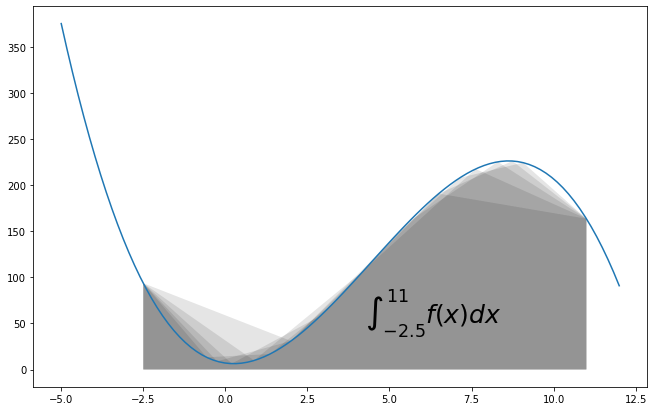

In [4]:
plt.figure(figsize=(11,7))
plt.plot(x,y)
for n in range(4, 9):
    x_int = np.linspace(-2.5, 11, n)
    y_int = f(x_int)
    plt.fill_between(x_int, 0, y_int, facecolor='black', alpha=0.1)
plt.text(4.25, 50, '$\int_{-2.5}^{11} f(x)dx$', fontsize=25, style='normal')
plt.show()

The error of the discretized trapezoidal rule is the difference between the value of the integral and the approximated result: $\newline \displaystyle E = \int_a^b f(x)dx - \frac{b-a}{N} \left[\frac{f(a) + f(b)}{2} + \sum_{k=1}^{N-1}f\left(a+k \frac{b-a}{N}\right)\right]$ If the integrand is concave up (and thus has a positive second derivative), then the error is negative and the trapezoidal rule overestimates the true value; Concave-down function yields an underestimate because area is unaccounted for under the curve, but none is counted above. The more inflection points we have in the approximation interval the harder to estimate the error is.

$\displaystyle \int -\frac{3}{4}x^3 + 10 x^2 - 5x + 7 dx = -\frac{3}{16}x^4 + \frac{10x^3}{3}-\frac{5x^2}{2} + 7x + C$

In [8]:
f_int = lambda x : (-3 / 16) * np.power(x,4) + (10/3) * np.power(x,3) - 2.5 * np.power(x,2) + 7*x
integral_result = np.round((f_int(11) - f_int(-2.5)),2)
print('Integral: ', integral_result)
print('Trapezoidal rule approximation with N=5: ', np.round(trapezoidal(f, -2.5, 11, 5),2))

Integral:  1558.51
Trapezoidal rule approximation with N=5:  1569.72


Below is a plot to show how the trapezoidal rule approaches the integral as N increases:

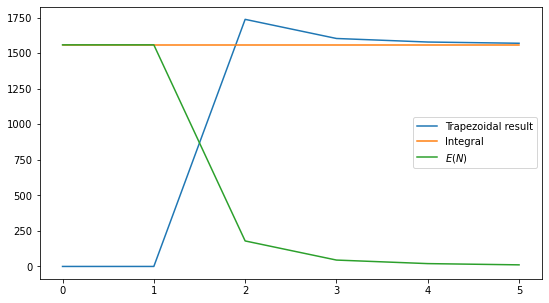

In [16]:
def discretization_error(f,a,b,N):
    return range(N), [trapezoidal(f, a, b, n) for n in range(N)]

N = 6
trap_result = discretization_error(f,-2.5,11,N)
int_result = [integral_result]*N
error = np.abs(np.array(int_result) - np.array(trap_result[1]))
plt.figure(figsize=(9,5))
plt.plot(*trap_result, label='Trapezoidal result')
plt.plot(range(0,N), int_result, label="Integral")
plt.plot(range(0,N), error, label='$E(N)$')
plt.legend()
plt.show()